<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br>Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите файл с ответами в соответствующем Programming Assignment. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc).  


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import pickle
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
def prepare_train_set(path_to_csv_files, session_length=10):
    sites = {}
    sitesColumns = ['site%s' % i for i in range(1, session_length+1)]
    sitesColumns.extend(['user_id'])
    resultDf = pd.core.frame.DataFrame(columns=sitesColumns)
    for root, dirnames, filenames in os.walk(path_to_csv_files):
        for filename in tqdm_notebook(fnmatch.filter(filenames, '*.csv')):
            user = int(filename.replace('user','').replace('.csv',''))
            df = pd.read_csv(path_to_csv_files + '/' + filename).sort_values(by=['timestamp'])
            
            dic = {k[0]: (i+1,k[1]) for  i, k in enumerate(df["site"].value_counts().iteritems())}
            for site, value in dic.iteritems():
                if site not in sites:
                    sites[site] = (len(sites)+1,value[1])
                else:
                    curVal=sites[site]
                    sites[site]=(curVal[0],curVal[1]+value[1])
            sessionRow=[]
        
            df["site_id"] = df['site'].apply(lambda ts: sites[ts][0]) 
            arr = np.array(df["site_id"])
            arr = np.append(arr,[0] * ((session_length-df.shape[0]%10)%10))
            
            arr = arr.reshape(int(len(arr) / session_length), session_length)
            b = np.zeros((arr.shape[0],session_length+1))+user
            b[:,:-1] = arr
            
            resultDf = pd.concat([resultDf, pd.DataFrame(b,columns=sitesColumns, dtype=np.int)], axis=0)
    return resultDf, sites

In [3]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = '../data/capstone_user_identification'

In [3]:
def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    ''' ВАШ КОД ЗДЕСЬ'''

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [7]:
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                       session_length=5, window_size=3)

In [8]:
X_toy_s5_w3.todense()

matrix([[0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0],
        [3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [9]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3])

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [ ]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = ''' ВАШ КОД ЗДЕСЬ '''

**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

In [9]:
''' ВАШ КОД ЗДЕСЬ '''

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [4]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [5]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,584,530,744,536,744,744,536,744,723,744,31
1,430,469,625,467,913,744,15,435,317,644,31
2,644,536,644,644,43,287,430,665,644,331,31
3,147,17,665,644,644,644,644,811,842,1,31
4,883,644,43,845,553,195,252,658,792,658,31


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [13]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

In [6]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [127]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [130]:
len(num_unique_sites)

14061

In [8]:
pd.Series(num_unique_sites).value_counts()

7     2315
6     2161
8     2071
5     1728
9     1379
2     1246
4     1170
3      897
10     667
1      427
dtype: int64

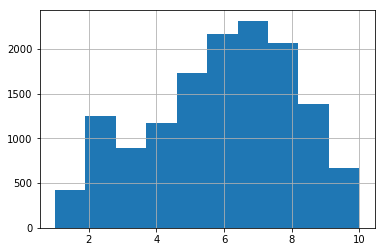

In [9]:
pd.Series(num_unique_sites).hist();

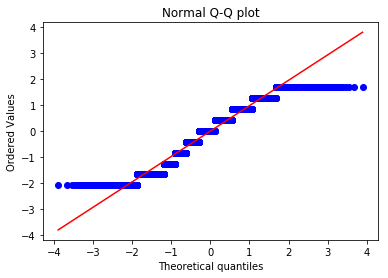

In [10]:
import scipy.stats as stats

z = (num_unique_sites-np.mean(num_unique_sites))/np.std(num_unique_sites)

stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [21]:
num_unique_sites

[5L,
 10L,
 7L,
 7L,
 9L,
 8L,
 7L,
 8L,
 8L,
 7L,
 7L,
 8L,
 9L,
 9L,
 8L,
 5L,
 6L,
 4L,
 6L,
 5L,
 7L,
 6L,
 5L,
 7L,
 4L,
 5L,
 6L,
 6L,
 8L,
 9L,
 8L,
 6L,
 7L,
 5L,
 5L,
 6L,
 6L,
 6L,
 8L,
 7L,
 7L,
 7L,
 8L,
 6L,
 6L,
 6L,
 9L,
 6L,
 6L,
 6L,
 8L,
 7L,
 7L,
 8L,
 10L,
 5L,
 8L,
 9L,
 10L,
 4L,
 10L,
 6L,
 9L,
 7L,
 7L,
 7L,
 7L,
 9L,
 8L,
 7L,
 7L,
 7L,
 6L,
 4L,
 7L,
 8L,
 6L,
 7L,
 5L,
 7L,
 7L,
 7L,
 9L,
 6L,
 7L,
 10L,
 6L,
 6L,
 7L,
 7L,
 9L,
 8L,
 7L,
 7L,
 6L,
 5L,
 3L,
 2L,
 5L,
 8L,
 9L,
 9L,
 5L,
 5L,
 5L,
 9L,
 6L,
 7L,
 3L,
 1L,
 2L,
 4L,
 1L,
 1L,
 1L,
 1L,
 1L,
 2L,
 1L,
 5L,
 8L,
 7L,
 8L,
 8L,
 2L,
 5L,
 8L,
 5L,
 7L,
 5L,
 1L,
 2L,
 1L,
 1L,
 6L,
 8L,
 8L,
 5L,
 7L,
 5L,
 9L,
 6L,
 8L,
 8L,
 10L,
 8L,
 8L,
 7L,
 10L,
 7L,
 5L,
 8L,
 4L,
 4L,
 3L,
 7L,
 6L,
 7L,
 9L,
 10L,
 8L,
 9L,
 8L,
 10L,
 9L,
 9L,
 8L,
 8L,
 7L,
 8L,
 9L,
 7L,
 9L,
 7L,
 10L,
 9L,
 10L,
 7L,
 6L,
 7L,
 10L,
 6L,
 5L,
 7L,
 5L,
 7L,
 5L,
 9L,
 7L,
 9L,
 9L,
 8L,
 10L,
 7L,
 9L,
 9L,
 8L,
 7

In [11]:
stats.shapiro(num_unique_sites)

(0.9544311165809631, 0.0)

In [13]:
np.random.seed(17)
x = stats.norm.rvs(loc=5, scale=3, size=100)
stats.shapiro(x)

(0.9772805571556091, 0.08144091814756393)

In [15]:
np.random.rand(5000)

array([ 0.45976156,  0.87081979,  0.18129868, ...,  0.89990916,
        0.90940149,  0.53743215])

In [18]:
np.random.normal(5000)

5000.364236483885

In [16]:
stats.shapiro(np.random.rand(5000))

(0.9548801183700562, 9.234426839403055e-37)

In [19]:
n = 10000000  # Number of samples to generate
k = 10000     # Batch size
a = np.empty(n, dtype=np.float16)
for i in range(0, n, k):
    a[i:i+k] = np.random.normal(loc=0, scale=1, size=k)

In [20]:
stats.shapiro(a)

(0.996959924697876, 0.0)

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

In [ ]:
''' ВАШ КОД ЗДЕСЬ '''

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [22]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [121]:
len(num_unique_sites)

14061

In [58]:
has_two_similar.shape

(14061L,)

In [132]:
unique, counts = np.unique(has_two_similar, return_counts=True)

print(np.asarray((unique, counts)).T)

[[    0   667]
 [    1 13394]]


In [133]:
x = np.array(has_two_similar)
y = np.bincount(x)
ii = np.nonzero(y)[0]

In [134]:
zip(ii,y[ii]) 

[(0, 667), (1, 13394)]

In [106]:
has_two_similar

14061

In [74]:
stats.binom_test?

In [100]:
pi_val = stats.binom_test(667, 14061, p=0.95,alternative="less")

In [135]:
np.random.seed(17)

In [139]:
13394/14061

0.9525638290306522

In [147]:
stats.binom_test(13394, 14061, p=0.5,alternative="greater")

4.9406564584124654e-324

In [114]:
1-stats.binom_test([1,1-0.04979841720173212], p=0.95,alternative="greater")

0.050000000000000044

**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [142]:
from statsmodels.stats.proportion import proportion_confint

In [143]:
proportion_confint(13394, 14061, method='wilson')

(0.94892501328426881, 0.95595543184995813)

In [115]:

from math import sqrt

def confidence(ups, downs):
    n = ups + downs

    if n == 0:
        return 0

    z = 1.96 #1.44 = 85%, 1.96 = 95%
    phat = float(ups) / n
    return ((phat + z*z/(2*n) - z * sqrt((phat*(1-phat)+z*z/(4*n))/n))/(1+z*z/n))

In [116]:
confidence(667,13394)

0.04404450803533392

In [117]:
confidence(13394,13394+667)

0.4819422451417067

In [25]:
wilson_interval = ''' ВАШ КОД ЗДЕСЬ '''

In [26]:
print('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)))

**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [28]:
site_freqs = ''' ВАШ КОД ЗДЕСЬ '''

In [ ]:
''' ВАШ КОД ЗДЕСЬ '''

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [31]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [32]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [34]:
''' ВАШ КОД ЗДЕСЬ '''

## Пути улучшения
Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.